# Домашнее задание

Всего у вас 2 домашних задания:

### 1) Бинарная классификация на примере детекции фрода на кредитных картах (6 баллов)
(в этом файле)

### 2) Небинарная классификация на вашем датасете (6 баллов)
(тоже в этом файле)

# 1 - Бинарная классификация на примере детекции фрода на кредитных картах (суммарно 6 баллов)
У вас есть информация о множесте транзакций. Вам нужно научиться предсказывать, какие из них мошеннические, а какие нет.

### (1 балл) Считайте данные
Сами считайте и предобработайте, если надо, данные из файла creditcard.csv

In [21]:
%matplotlib inline
from matplotlib import pyplot as plt 
import numpy as np
import pandas as pd

In [22]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [23]:
X = data.drop(columns=['Class'])
y = data['Class'] # 1 - fraud

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, precision, recall, f1, roc_auc. Постройте ROC-кривую.

In [71]:
from sklearn.metrics import roc_auc_score


def logloss(y_real, y_pred_proba) :
    return - np.sum(np.log(1 - np.abs(y_real - y_pred_proba)))


def accuracy(y_real, y_pred) :
    return np.mean(y_real == y_pred)


def precision(y_real, y_pred) :
    return (np.mean(y_real[y_pred == 1]))


def recall(y_real, y_pred) :
    return np.mean(y_pred[y_real == 1])


def F1(precision, recall) :
    return 2 * precision * recall / (precision + recall)


def F1(y_real, y_pred) :
    prec = precision(y_real, y_pred)
    rec = recall(y_real, y_pred)
    return 2 * prec * rec / (prec + rec)


def print_metrics(machine, y_real, y_pred, y_pred_proba) :
    print('{} accuracy = {}'.format(machine, accuracy(y_real, y_pred)))
    print('{} logloss = {}'.format(machine, logloss(y_real, y_pred_proba)))
    print('{} precision = {}'.format(machine, precision(y_real, y_pred)))
    print('{} recall = {}'.format(machine, recall(y_real, y_pred)))
    print('{} F1 = {}'.format(machine, F1(y_real, y_pred)))
    print('{} roc_auc = {}'.format(machine, roc_auc_score(y_test, y_pred_proba)))
    


In [34]:
from sklearn.metrics import roc_curve

def ROC_curve(machine, y_real, y_pred_proba) :
    plt.figure(figsize=(7, 7))
    fpr, tpr, thresholds = roc_curve(y_real, y_pred_proba)
    plt.plot(fpr, tpr, 'b', linewidth=3)

    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot([0, 0], [0, 1], 'k')
    plt.plot([1, 1], [0, 1], 'k')
    plt.plot([0, 1], [0, 0], 'k')
    plt.plot([0, 1], [1, 1], 'k')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.xlim((0, 1))
    plt.ylim((0, 1))
    plt.axis('equal')
    plt.title(machine + ' ROC curve')
    plt.show()

In [27]:
from warnings import filterwarnings
filterwarnings('ignore')

In [28]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression() 

log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)
y_pred_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]

log_reg accuracy = 0.9989466661985184
log_reg logloss = 920.3499246874023
log_reg precision = 0.6949152542372882
log_reg recall = 0.6029411764705882
log_reg F1 = 0.6456692913385826
log_reg roc_auc = 0.9050054681396396


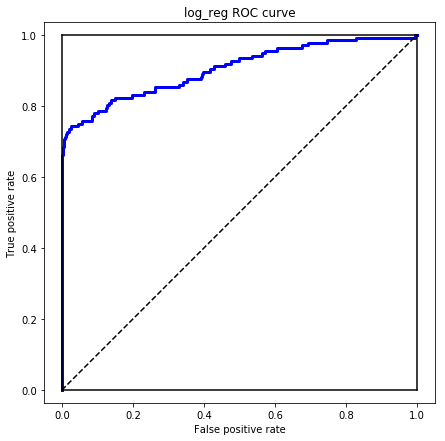

In [35]:
print_metrics('log_reg', y_test, y_pred_log_reg, y_pred_proba_log_reg)
ROC_curve('log_reg', y_test, y_pred_proba_log_reg)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]

KNN accuracy = 0.9984785178423042
KNN logloss = inf
KNN precision = 1.0
KNN recall = 0.04411764705882353
KNN F1 = 0.08450704225352113
KNN roc_auc = 0.6163120449394196


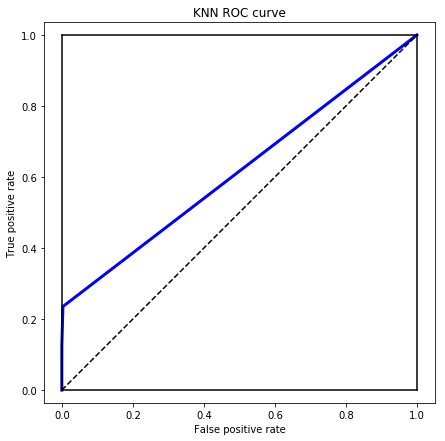

In [36]:
print_metrics('KNN', y_test, y_pred_knn, y_pred_proba_knn)
ROC_curve('KNN', y_test, y_pred_proba_knn)

const accuracy = 0.9984082955888721
const logloss = inf
const precision = nan
const recall = 0.0
const F1 = nan
const roc_auc = 0.5


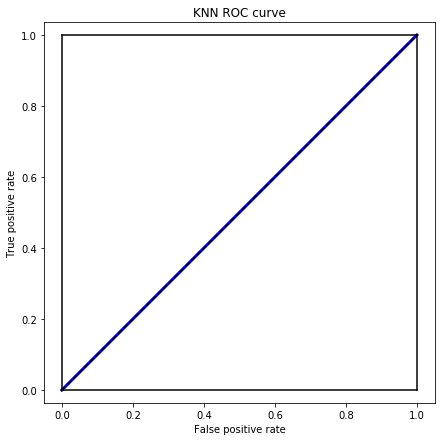

In [37]:
y_pred_const = np.zeros(len(X_test)) 
y_pred_proba_const = y_pred_const

print_metrics('const', y_test, y_pred_const, y_pred_proba_const)
ROC_curve('KNN', y_test, y_pred_proba_const)

In [33]:
#как видим, логистическая регрессия имеет наиболее хороший результат почти по всем метрикам

### (1 балл) Выберите одну метрику, которую вы будете максимизировать

Представьте, что вы решаете задачу автоматического поиска мошеннических транзакций, чтобы ваш робот автоматически банил пользователей, который их осуществляют.

Обоснуйте свой выбор.

In [39]:
'''
    Предсказывание мошеннических транзакций - дело серьезное, пусть лучше машина случайно забанит нормальный
    платеж, и потом с ним разберется человек, чем пропустит мошенническую транзакцию, и произойдет что то плохое.
    По этому я буду максимизировать метрику Recall, то есть долю правельно предсказанных мошеннических транзакций, среди
    всех мошеннических транзакций
'''

'\n    Предсказывание мошеннических транзакций - дело серьезное, пусть лучше машина случайно забанит нормальный\n    платеж, и потом с ним разберется человек, чем пропустит мошенническую транзакцию, и произойдет что то плохое.\n    По этому я буду максимизировать метрику Recall, то есть долю правельно предсказанных мошеннических транзакций, среди\n    всех мошеннических транзакций\n'

### (2 балла) Переберите гиперпараметры разных моделей, попытайтесь добиться лучшего результата по этой метрике

Постройте график для каждого перебора, сделайте красивый отчет (не надо просто говорить "я решил выбрать 2, 0.7 и 6, так не пойдет".

Можно преобразовывать датасет, преобразовывать, добавлять, удалять фичи, всё что угодно.

Отсутствие результата тоже результат (вдруг вы перебрали кучу вещей, а лучший все еще самый первый запуск, главное что перебрали).

penalty = l1; recall color = b; precision color = r
penalty = l2; recall color = g; precision color = y


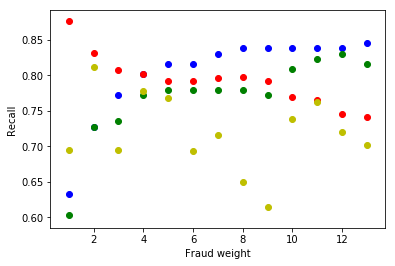

In [54]:
colors1 = ['b', 'g']
colors2 = ['r', 'y']
i_color = -1

for pen in ['l1', 'l2'] :
    i_color += 1
    print('penalty = {}; recall color = {}; precision color = {}'.format(pen, colors1[i_color], colors2[i_color]))
    for fraud_weight in range(1, 14) :
        lgw = LogisticRegression(penalty=pen, class_weight={0: 1, 1: fraud_weight})
        lgw.fit(X_train, y_train)
        y_pred_lgw = lgw.predict(X_test)
        plt.scatter(fraud_weight, recall(y_test, y_pred_lgw), color=colors1[i_color])
        plt.scatter(fraud_weight, precision(y_test, y_pred_lgw), color=colors2[i_color])
    
    
plt.xlabel('Fraud weight') 
plt.ylabel('Recall')
plt.show()

In [ ]:
'''
    Полнота конечно же очень важна, но говорить, что все платежи плохие тоже не очень. 
    Поэтому я вижу довольно хорошими параметрами penalty = l1 и class_weight = {0: 1, 1: 8}

'''

# 2 - Небинарная классификация на вашем датасете (суммарно 6 баллов)

### (2 балла) Выберите какой-нибудь интересный вам датасет, скачайте его и считайте данные

Творческое задание - найти в интернете (или собрать свой даже) датасет, сохранить его в файл, и загрузить сюда.

Требования:

- он должен быть немаленький (хотя бы 500 объектов, лучше больше)
- он должен быть интересный
- таргет должен быть небинарным классом

Минус балл, если ваш датасет с кем-нибудь повторится.

In [68]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

dataset = load_wine()
dataset.keys()
X = dataset['data']
y = dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [69]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression() 

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

### (2 балла) Выберите метрику, которую вы хотите максимизировать. Переберите гиперпараметры, постарайтесь найти модель, которая максимизирует эту метрику.

Обоснуйте свой выбор. Напишите красивый отчет с графиками. Добились ли вы результатов, которых хотели добиться для этого датасета?

In [81]:
'''
    так как из - за ошибки выбора типа вина не нисет особых последствий, надо выбрать обычную метрикуб то есть - accuracy
'''

'\n    так как из - за ошибки выбора типа вина не нисет особых последствий, надо выбрать обычную метрикуб то есть - accuracy\n'

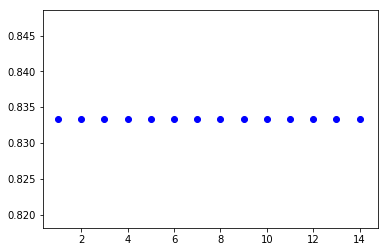

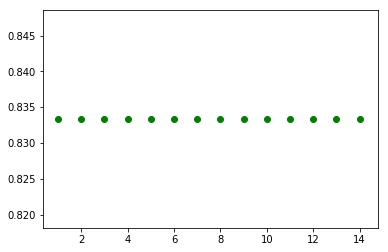

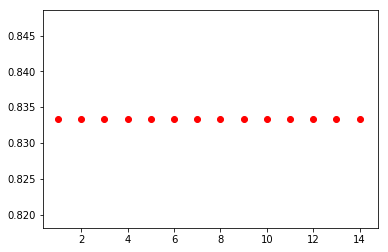

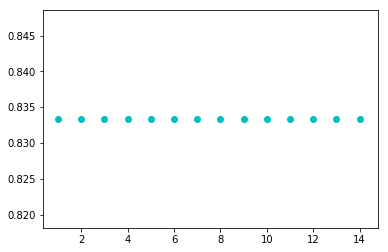

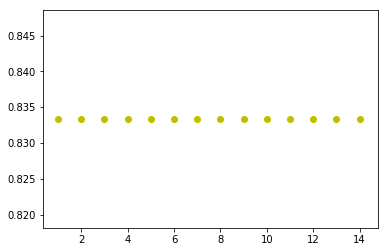

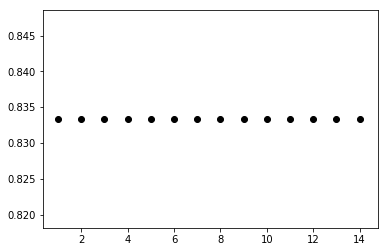

IndexError: list index out of range

In [94]:
colors = ['b', 'g', 'r', 'c', 'y', 'k']
i_color = -1
 
    
n = 15
    
for weight1 in range(1, n) :
    for weight2 in range(1, n) :
        i_color += 1
        for weight3 in range(1, n) :
            lgw = LogisticRegression(class_weight={0: weight1, 1: weight2, 2: weight3})
            lgw.fit(X_train, y_train)
            y_pred_lgw = lgw.predict(X_test)
            plt.scatter(weight3, accuracy(y_test, y_pred_lgw), color=colors[i_color])
        plt.show()
    
    #почему то ничего не меняется, видимо получилось очень хоршая машина)
    